In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import pandas as pd
from torchvision import transforms
from PIL import Image
from torch.utils.data import Dataset, DataLoader

In [13]:
# 2. Creează o clasă personalizată pentru Dataset
class CustomImageDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        #img_path = 'Data/train/' + self.annotations.iloc[idx, 0] + '.png'
        img_path = f'{self.root_dir}/{self.annotations.iloc[idx, 0]}.png'
        image = Image.open(img_path).convert("RGB")
        label = 0
        if self.root_dir != 'Data/test':
            label = int(self.annotations.iloc[idx, 1])

        if self.transform:
            image = self.transform(image)

        return image, label
# 3. Definirea transformărilor pentru datele de antrenament și validare
transform = transforms.Compose([
    transforms.Resize((80, 80)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1)),
    transforms.RandomResizedCrop(80, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


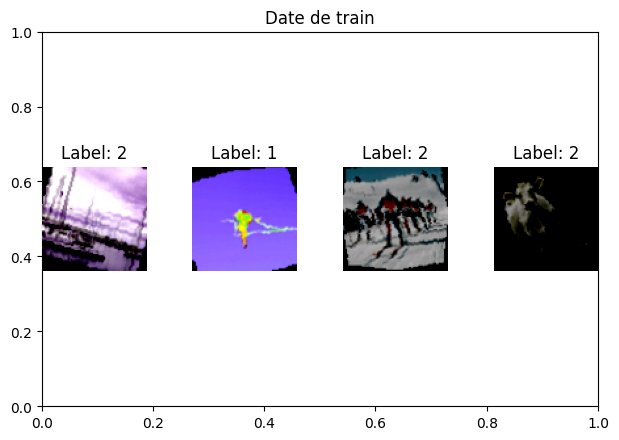

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


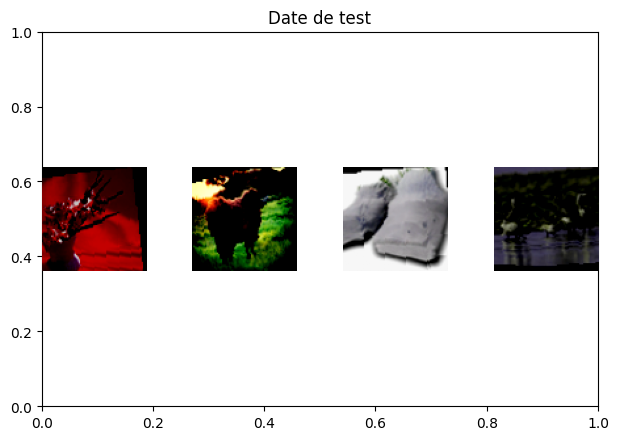

In [14]:
#datele de train sunt in Data/train.csv
csv_file = 'Data/train.csv'
data_df = pd.read_csv(csv_file)
root_dir = 'Data/train'
train_data = CustomImageDataset(csv_file=csv_file, root_dir=root_dir, transform=transform)

csv_file = 'Data/validation.csv'
data_df = pd.read_csv(csv_file)
root_dir = 'Data/validation'
validation_data = CustomImageDataset(csv_file=csv_file, root_dir=root_dir, transform=transform)

csv_file = 'Data/test.csv'
data_df = pd.read_csv(csv_file)
root_dir = ('Data/test')
test_data = CustomImageDataset(csv_file=csv_file, root_dir=root_dir, transform=transform)
#plotam imaginile si deasupra lor scriem label-ul
fig = plt.figure()
plt.title("Date de train")


# plotam cateva imagini de antrenare
for i in range(len(train_data)):
    image, label = train_data[i]
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Label: %d' % label)
    ax.axis('off')
    plt.imshow(image.permute(1, 2, 0))
    if i == 3:
        break
plt.show()
#plotam cateva imagini de test
fig = plt.figure()
plt.title("Date de test")
for i in range(len(test_data)):
    image = test_data[i]
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.axis('off')
    plt.imshow(image[0].permute(1, 2, 0))
    if i == 3:
        break
plt.show()


In [15]:
class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(512)
        self.fc1 = nn.Linear(512 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = x.view(-1, 512 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Instanțierea modelului
model = ImprovedCNN()
model.to('cuda')

ImprovedCNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=12800, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=3, bias=True)
)

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [24]:
num_epochs = 15
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(validation_data, batch_size=32, shuffle=False)
total_train = len(train_data)
total_val = len(validation_data)
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
    print(f"Epocă {epoch+1}, Pierdere antrenament: {running_loss/len(train_loader)}, Acuratețe antrenament: {correct_train/total_train}")
    validate(model, val_loader)
    print("--------------------------------------------------")

Epocă 1, Pierdere antrenament: 0.6555885783988292, Acuratețe antrenament: 0.7136190476190476
Pierdere validare: 1.053907518691205, Acuratețe validare: 0.59
--------------------------------------------------
Epocă 2, Pierdere antrenament: 0.6656970956042907, Acuratețe antrenament: 0.7104761904761905
Pierdere validare: 0.8192614196462834, Acuratețe validare: 0.6426666666666667
--------------------------------------------------
Epocă 3, Pierdere antrenament: 0.6611301860004936, Acuratețe antrenament: 0.7099047619047619
Pierdere validare: 0.883611224433209, Acuratețe validare: 0.6163333333333333
--------------------------------------------------


KeyboardInterrupt: 

In [22]:
# Validare model
def validate(model, val_loader):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    predictions = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to('cuda'), labels.to('cuda')
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            predictions.extend(predicted.cpu().numpy())  # colectăm predicțiile
    print(f"Pierdere validare: {val_loss/len(val_loader)}, Acuratețe validare: {correct/total}")
    return predictions  # returnăm predicțiile pentru a putea fi utilizate


In [25]:
# lasam in lista de predictii doar clasa prezisa
predictions = validate(model, val_loader)

Pierdere validare: 0.8424155655059409, Acuratețe validare: 0.6423333333333333


In [26]:
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [27]:
predictions_test = []
model.eval()
val_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        outputs = model(inputs)
        loss = criterion(outputs, labels)  
        val_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        predictions_test.append(predicted)
print(predictions_test)

[tensor([1, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 1,
        1, 2, 1, 1, 0, 1, 0, 2], device='cuda:0'), tensor([1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1,
        2, 1, 0, 2, 1, 1, 1, 1], device='cuda:0'), tensor([1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2, 1, 2, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1,
        0, 0, 1, 1, 0, 1, 0, 0], device='cuda:0'), tensor([1, 1, 0, 2, 1, 1, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        1, 1, 1, 2, 1, 1, 0, 2], device='cuda:0'), tensor([0, 0, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 2, 2, 1, 1, 1, 1, 0], device='cuda:0'), tensor([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 1, 1,
        0, 2, 2, 1, 1, 1, 2, 0], device='cuda:0'), tensor([1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0, 2, 1, 1,
        1, 1, 1, 2, 0, 2, 0, 1], device='cuda:0'), tensor([1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 2, 1, 2,
  

In [28]:
labels = [tensor.tolist() for tensor in predictions_test]

In [29]:
labels = []
for tensor in predictions_test:
    labels.extend(tensor.tolist())
print(labels)

[1, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2, 1, 2, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 

In [30]:
csv_file = 'Data/test.csv'
data_df = pd.read_csv(csv_file)
data_df['label'] = labels
data_df.to_csv('Data/submission3.csv', index=False)

In [31]:
print(len(predictions_test))

141


In [1]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.ylabel('Etichetă adevărată')
    plt.xlabel('Etichetă prezisă')
    plt.show()

In [3]:
#facem matricea de confuzie
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

NameError: name 'model' is not defined